In [2]:
import pandas as pd

In [3]:
player_name = 'erauskin_anne'

In [4]:
record_date = '20230423'

In [7]:
ACTIVITY_LOAD_DATASET_FILE_DIR = f'../../datasets/study-players/{record_date}/{player_name}_activity_load.csv'
HR_DATASET_FILE_DIR = f'../../datasets/study-players/{record_date}/{player_name}_hr_without_gaps.csv'
PLAYER_IS_ON_COURT_DATASET_FILE_DIR = f'../../datasets/study-players/{record_date}/{player_name}_is_on_court.csv'

In [8]:
hr = pd.read_csv(HR_DATASET_FILE_DIR,index_col=0)
hr.head()

,seconds,date,hr,diff
0,1045.302,[2023-04-23 18:27:39 551],75.0,NaN
1,1045.802,[2023-04-23 18:27:40 051],75.0,0.5
2,1046.302,[2023-04-23 18:27:40 551],75.0,0.5
3,1046.802,[2023-04-23 18:27:41 051],75.0,0.5
4,1047.302,[2023-04-23 18:27:41 551],77.0,0.5


In [10]:
activity_load = pd.read_csv(ACTIVITY_LOAD_DATASET_FILE_DIR)
activity_load.head()

,Unnamed: 0,seconds,date,activity_load_2d,activity_load_3d
0,116,1.709,[2023-04-23 18:10:15 958],0.0447,0.0566
1,225,2.709,[2023-04-23 18:10:16 958],0.0353,0.0427
2,336,3.709,[2023-04-23 18:10:17 958],0.0433,0.0543
3,446,4.709,[2023-04-23 18:10:18 958],0.0393,0.0495
4,553,5.709,[2023-04-23 18:10:19 958],0.0253,0.0335


Los datasets tienen distinto número de registros

In [11]:
print(f'Número de registros de HR: {len(hr)}')

Número de registros de HR: 19217


In [12]:
print(f'Número de registros de ActivityLoad: {len(activity_load)}')

Número de registros de ActivityLoad: 10626


El número cuadra, es casi el doble.

Coger los datos desde el inicio de partido

Hay que indicar cuando empieza el partido

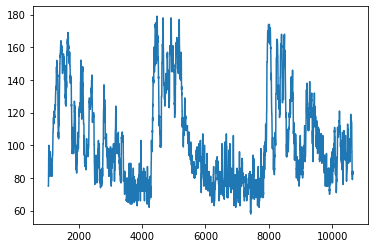

In [13]:
import matplotlib.pyplot as plt

x = hr['seconds']
y = hr['hr']

# Crear una figura y ejes
fig, ax = plt.subplots()
ax.plot(x, y, linestyle='-')

In [14]:
match_start = 2962

In [15]:
activity_match = activity_load[activity_load['seconds']>match_start]
activity_match.reset_index(inplace=True)
activity_match

,index,Unnamed: 0,seconds,date,activity_load_2d,activity_load_3d
0,2953,332523,2962.456,[2023-04-23 18:59:36 705],0.0160,0.0193
1,2954,332639,2963.456,[2023-04-23 18:59:37 705],0.0144,0.0164
2,2955,332751,2964.456,[2023-04-23 18:59:38 705],0.0105,0.0125
3,2956,332863,2965.456,[2023-04-23 18:59:39 705],0.0076,0.0091
4,2957,332977,2966.456,[2023-04-23 18:59:40 705],0.0066,0.0075
...,...,...,...,...,...,...
7668,10621,1202568,10650.791,[2023-04-23 21:07:45 040],0.0821,0.1057
7669,10622,1202680,10651.791,[2023-04-23 21:07:46 040],0.0603,0.0747
7670,10623,1202795,10652.791,[2023-04-23 21:07:47 040],0.0257,0.0315
7671,10624,1202907,10653.791,[2023-04-23 21:07:48 040],0.0150,0.0167


De hr, tan solo se coge la mitad del dataset

In [16]:
hr_match = hr.iloc[hr.index % 2 == 0][hr['seconds']>match_start]
hr_match.reset_index(inplace=True)
hr_match

/tmp/ipykernel_4814/955440834.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hr_match = hr.iloc[hr.index % 2 == 0][hr['seconds']>match_start]


,index,seconds,date,hr,diff
0,3834,2962.302,[2023-04-23 18:59:36 551],87.0,0.5
1,3836,2963.302,[2023-04-23 18:59:37 551],86.0,0.5
2,3838,2964.302,[2023-04-23 18:59:38 551],86.0,0.5
3,3840,2965.302,[2023-04-23 18:59:39 551],85.0,0.5
4,3842,2966.302,[2023-04-23 18:59:40 551],86.0,0.5
...,...,...,...,...,...
7690,1202344,10648.802,[2023-04-23 21:07:43 051],83.0,0.5
7691,1202570,10650.802,[2023-04-23 21:07:45 051],84.0,0.5
7692,1202624,10651.302,[2023-04-23 21:07:45 551],84.0,0.5
7693,1202682,10651.802,[2023-04-23 21:07:46 051],84.0,0.5


In [17]:
hr_match['activity_load_2d'] = activity_match['activity_load_2d']

In [18]:
hr_match['activity_load_3d'] = activity_match['activity_load_3d']

In [19]:
hr_match

,index,seconds,date,hr,diff,activity_load_2d,activity_load_3d
0,3834,2962.302,[2023-04-23 18:59:36 551],87.0,0.5,0.0160,0.0193
1,3836,2963.302,[2023-04-23 18:59:37 551],86.0,0.5,0.0144,0.0164
2,3838,2964.302,[2023-04-23 18:59:38 551],86.0,0.5,0.0105,0.0125
3,3840,2965.302,[2023-04-23 18:59:39 551],85.0,0.5,0.0076,0.0091
4,3842,2966.302,[2023-04-23 18:59:40 551],86.0,0.5,0.0066,0.0075
...,...,...,...,...,...,...,...
7690,1202344,10648.802,[2023-04-23 21:07:43 051],83.0,0.5,NaN,NaN
7691,1202570,10650.802,[2023-04-23 21:07:45 051],84.0,0.5,NaN,NaN
7692,1202624,10651.302,[2023-04-23 21:07:45 551],84.0,0.5,NaN,NaN
7693,1202682,10651.802,[2023-04-23 21:07:46 051],84.0,0.5,NaN,NaN


In [21]:
hr_match.drop(['index', 'diff'],axis=1, inplace=True)

In [22]:
hr_match.head()

,seconds,date,hr,activity_load_2d,activity_load_3d
0,2962.302,[2023-04-23 18:59:36 551],87.0,0.0160,0.0193
1,2963.302,[2023-04-23 18:59:37 551],86.0,0.0144,0.0164
2,2964.302,[2023-04-23 18:59:38 551],86.0,0.0105,0.0125
3,2965.302,[2023-04-23 18:59:39 551],85.0,0.0076,0.0091
4,2966.302,[2023-04-23 18:59:40 551],86.0,0.0066,0.0075


Ahora hay que añadir la etiqueta de si está en pista o no

In [23]:
player_is_on_court = pd.read_csv(PLAYER_IS_ON_COURT_DATASET_FILE_DIR,index_col=0)
player_is_on_court.head()

,Start,End,Event,Is On Court
0,0,0,FIRST_HALF_START,0
1,0,36,FOUL_RECEIVE,0
2,36,45,POST_OUT,0
3,45,55,LOST_BALL,0
4,55,84,FOUL_RECEIVE,0


In [24]:
is_on_court_list = []
for index, row in player_is_on_court.iterrows():
    diff = row[' End'] - row[' Start']
    value = row['Is On Court']
    #if row[' Event'] == 'TIMEOUT' or row[' Event'] == ' 2_MIN':
        #diff = 60
        #value = 0
        #print(str(value * diff))
    list.extend(is_on_court_list,list(str(value) * diff))
print(len(is_on_court_list))

5059


Una vez se tiene esta lista, se debe introducir como etiqueta

In [25]:
values_to_complete = len(hr_match) - len(is_on_court_list)

In [26]:
print(f'Hay que añadir {values_to_complete} valores nulos')

Hay que añadir 2636 valores nulos


In [27]:
for i in range(0,values_to_complete):
    is_on_court_list.append(None)

In [28]:
hr_match['IsOnCourt'] = is_on_court_list

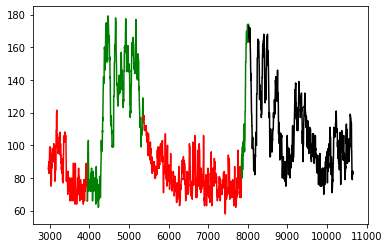

In [29]:
import matplotlib.pyplot as plt

colores = {'0': 'red', '1': 'green', None: 'black'}
x = hr_match['seconds']
y = hr_match['hr']

valores_convertidos = [colores[valor] for valor in hr_match['IsOnCourt']]

# Crear una figura y ejes
fig, ax = plt.subplots()

# Initialize variables for segment plotting
segment_start = 0
current_color = valores_convertidos[0]

# Iterate through the data to plot segments with different colors
for i in range(1, len(x)):
    if valores_convertidos[i] != current_color:
        # Plot the current segment with the current color
        ax.plot(x[segment_start:i], y[segment_start:i], linestyle='-', color=current_color)
        
        # Update the segment start and current color
        segment_start = i
        current_color = valores_convertidos[i]

# Plot the last segment
ax.plot(x[segment_start:], y[segment_start:], linestyle='-', color=current_color)

plt.show()

# TODO: eliminar lo que no sea del partido. PARA MOSTRAR LOS DATOS DEL PARTIDO

In [30]:
hr_match.to_csv(f'../../datasets/study-players/{record_date}/{player_name}_match_attributes.csv')